In [7]:
"""

분류 알고리즘
- (1) 로지스틱 회귀
- (2) 서포트 벡터 머신
- (3) 결정 트리 

머신러닝 알고리즘을 훈련시키기 위한 다섯 가지 주요 단계
- (1) 특성을 선택하고 훈련 샘플을 모음
- (2) 성능 지표를 선택
- (3) 분류 모델과 최적화 알고리즘을 선택
- (4) 모델의 성능 평가
- (5) 알고리즘 튜닝

"""

'\n\n분류 알고리즘\n- (1) 로지스틱 회귀\n- (2) 서포트 벡터 머신\n- (3) 결정 트리 \n\n머신러닝 알고리즘을 훈련시키기 위한 다섯 가지 주요 단계\n- (1) 특성을 선택하고 훈련 샘플을 모음\n- (2) 성능 지표를 선택\n- (3) 분류 모델과 최적화 알고리즘을 선택\n- (4) 모델의 성능 평가\n- (5) 알고리즘 튜닝\n\n'

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


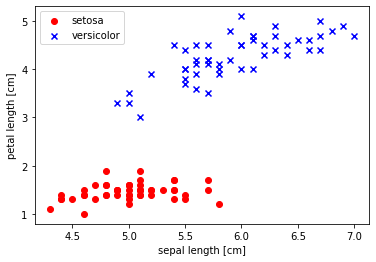

In [9]:
from sklearn import datasets
import numpy as np


"""
붓꽃 데이터셋에서 퍼셉트론 훈려
- 지도학습 -> 정답이 있는 데이터
- 알고리즘을 통해 모델 생성, 해당 모델을 통해 예측함

"""
import os
import pandas as pd

""" 붓꽃 데이터셋 읽기 """
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')
df.tail()

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# setosa와 versicolor를 선택합니다
"""타깃값 1차원 배열로 꺼냄"""
y = df.iloc[0:100, 4].values

"""Iris-setosa이면 -1, 아니면 1"""
y = np.where(y == 'Iris-setosa', -1, 1)

# 꽃받침 길이와 꽃잎 길이를 추출합니다
X = df.iloc[0:100, [0, 2]].values

# 산점도를 그립니다, setosa-음성, versicolor-양성
"""
- 처음 50개 -> setosa, 50에서 100개 -> versicolor
- 마커로 그림(setosa = red + o, versicolr = blue + x)
"""
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')


"""그래프 외곽 이름 넣어줌""" 
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()



In [27]:
"""
퍼셉트론 훈련 
"""

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target 


print("클래스 레이블 : ", np.unique(y)) # Iris-setosa, Iris-versicolor, Iris-virginica




클래스 레이블 :  [0 1 2]


In [12]:
"""

데이터 셋을 나눔
- 훈련 데이터셋/ 테스트 데이터셋으로 분할

"""
from sklearn.model_selection import train_test_split


# X와 y 배열을 랜덤하게 나눔, 30%는 테스트 데이터(45개), 70%는 훈련 데이터(105개)
X_train, X_test, y_train, y_test = train_test_split( # random_state = 실행 결과 재현하기 위함, 시드값 고정
    X, y, test_size=0.3, random_state=1, stratify=y) # stratify = y 계층화 기능을 사용 


In [13]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


In [15]:
from sklearn.preprocessing import StandardScaler

"""
특성 표준화 
"""

sc = StandardScaler()
sc.fit(X_train) 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [16]:
from sklearn.linear_model import Perceptron

"""
퍼셉트론 알고리즘 훈련
"""

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [18]:
"""
모델 예측 결과 확인 
"""

y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


In [21]:
from sklearn.metrics import accuracy_score
"""
모델 성능 평가
"""

print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


In [22]:
print('정확도: %.3f' % ppn.score(X_test_std, y_test))

정확도: 0.978


In [23]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정합니다.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그립니다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor=None if idx==1 else 'black')

    # 테스트 샘플을 부각하여 그립니다.
    if test_idx:
        # 모든 샘플을 그립니다.
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    facecolor='none',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100,
                    label='test set')


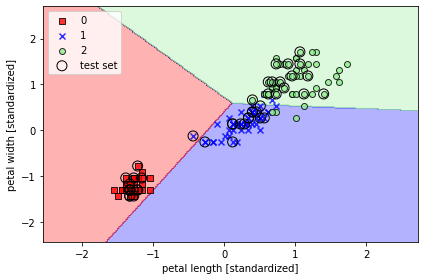

In [24]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_01.png', dpi=300)
plt.show()

In [28]:
"""
퍼셉트론은 선형적으로 구분되지 않는 데이터셋에는 수렴하지 못함 
"""

'\n퍼셉트론은 선형적으로 구분되지 않는 데이터셋에는 수렴하지 못함 \n'

In [29]:
"""
로지스틱 회귀를 사용한 클래스 확률 모델링

퍼셉트론의 한계
- (1) 클래스가 선형적으로 구분되지 않을 때 수렴 x
    - 에포크마다 적어도 하나의 샘플이 잘못 분류됨 -> 가중치 끊임없이 업데이트
    
선형 이진 분류 문제에 더 좋은 알고리즘 -> 로지스틱 회귀
"""

'\n로지스틱 회귀를 사용한 클래스 확률 모델링\n\n퍼셉트론의 한계\n- (1) 클래스가 선형적으로 구분되지 않을 때 수렴 x\n    - 에포크마다 적어도 하나의 샘플이 잘못 분류됨 -> 가중치 끊임없이 업데이트\n    \n선형 이진 분류 문제에 더 좋은 알고리즘 -> 로지스틱 회귀\n'

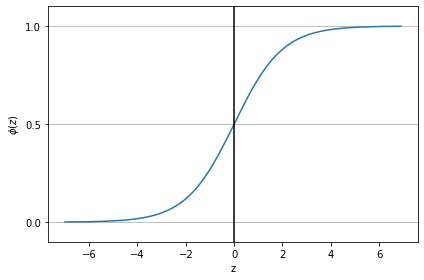

In [30]:
"""
시그 모이드 함수 
(https://ko.wikipedia.org/wiki/%EC%8B%9C%EA%B7%B8%EB%AA%A8%EC%9D%B4%EB%93%9C_%ED%95%A8%EC%88%98)

로지스틱 회귀 알고리즘
- 아달린에서 사용한 선형 활성화 함수를 바꿈
- 시그 모이드 함수로 대체함 (깃 허브 리드미 사진 참고)
"""

import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y 축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('images/03_02.png', dpi=300)
plt.show()

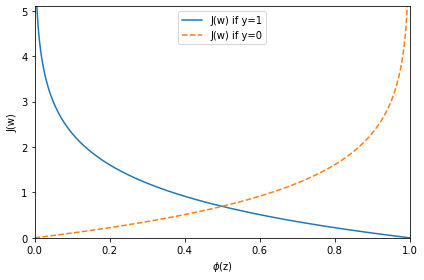

In [32]:
"""

x축 -> 0~1까지 범위의 시그모이드 활성화 값
y축 -> 로지스틱 비용

- 그래프 파란색 J(w) y = 1 -> 양성 샘플
- 그래프 노란색 J(w) y = 0 -> 음성 샘플
"""

def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_04.png', dpi=300)
plt.show()

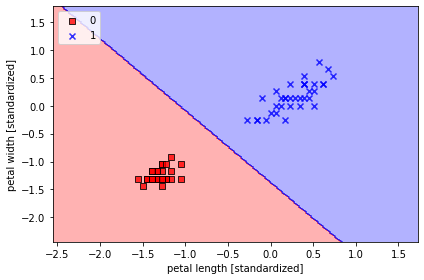

In [33]:
class LogisticRegressionGD(object):
    """경사 하강법을 사용한 로지스틱 회귀 분류기

    매개변수
    ------------
    eta : float
      학습률 (0.0과 1.0 사이)
    n_iter : int
      훈련 데이터셋 반복 횟수
    random_state : int
      가중치 무작위 초기화를 위한 난수 생성기 시드

    속성
    -----------
    w_ : 1d-array
      학습된 가중치
    cost_ : list
      에포크마다 누적된 로지스틱 비용 함수 값

    """
    def __init__(self, eta=0.05, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """훈련 데이터 학습

        매개변수
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          n_samples 개의 샘플과 n_features 개의 특성으로 이루어진 훈련 데이터
        y : array-like, shape = [n_samples]
          타깃값

        반환값
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()

            # 오차 제곱합 대신 로지스틱 비용을 계산합니다.
            cost = -y.dot(np.log(output)) - ((1 - y).dot(np.log(1 - output)))
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        """최종 입력 계산"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, z):
        """로지스틱 시그모이드 활성화 계산"""
        # 대신 from scipy.special import expit; expit(z) 을 사용할 수 있습니다.
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

    def predict(self, X):
        """단위 계단 함수를 사용하여 클래스 레이블을 반환합니다"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)
        # 다음과 동일합니다.
        # return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
X_train_01_subset = X_train_std[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

lrgd = LogisticRegressionGD(eta=0.05, n_iter=1000, random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

plot_decision_regions(X=X_train_01_subset,
                      y=y_train_01_subset,
                      classifier=lrgd)

plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('images/03_05.png', dpi=300)
plt.show()

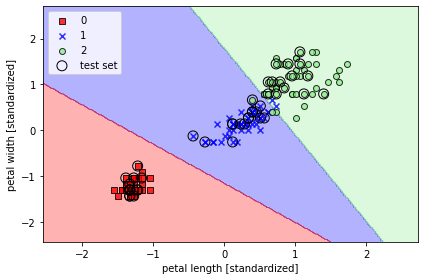

In [34]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1)
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [35]:
"""
과대적합
- 모델이 훈련 데이터에는 잘 동작함
- 테스트 데이타(새로운 데이타)에서는 일반화되지 않음
-> 너무 훈련 데이터에만 딱 들어맞는 모델 생성

과소적합
- 패턴을 감지할 정도로 충분히 모델이 복잡하지 않다는 것을 의미함 

좋은 편향-분산 트레이드오프를 찾는 방법
- 규제 : 공선성(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 
        과대적합을 방지할 수 있는 유용한 방법
    - L2 규제를 많이 사용

- 규제는 표준화 같은 특성 스케일 조정이 중요함
    - 특성이 비슷한 스케일을 가져야 규제가 잘 동작함
    
"""

'\n과대적합\n- 모델이 훈련 데이터에는 잘 동작함\n- 테스트 데이타(새로운 데이타)에서는 일반화되지 않음\n-> 너무 훈련 데이터에만 딱 들어맞는 모델 생성\n\n과소적합\n- 패턴을 감지할 정도로 충분히 모델이 복잡하지 않다는 것을 의미함 \n\n좋은 편향-분산 트레이드오프를 찾는 방법\n- 규제 : 공선성(특성 간의 높은 상관관계)을 다루거나 데이터에서 잡음을 제거하여 \n        과대적합을 방지할 수 있는 유용한 방법\n    - L2 규제를 많이 사용\n\n- 규제는 표준화 같은 특성 스케일 조정이 중요함\n    - 특성이 비슷한 스케일을 가져야 규제가 잘 동작함\n    \n'

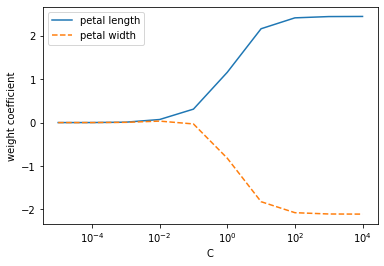

In [36]:
"""
L2 규제 효과를 그래프로 표현

- 매개변수 C가 감소하면 가중치 절대값이 줄어듦
- 즉, 규제 강도가 증가함 
"""


weights, params = [], []
for c in np.arange(-5, 5):
    lr = LogisticRegression(C=10.**c, random_state=1, multi_class='ovr')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('images/03_08.png', dpi=300)
plt.show()

In [37]:
"""
서포트 벡터 머신(SVM)
    - 퍼셉트론의 확장 버전
    - SVM의 최적화 대상은 마진을 최대화하는 것
        - 마진 : 클래스를 구분하는 초평면(결정 경계)과 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의
        

"""

'\n서포트 벡터 머신(SVM)\n    - 퍼셉트론의 확장 버전\n    - SVM의 최적화 대상은 마진을 최대화하는 것\n        - 마진 : 클래스를 구분하는 초평면(결정 경계)과 초평면에 가장 가까운 훈련 샘플 사이의 거리로 정의\n        \n\n'

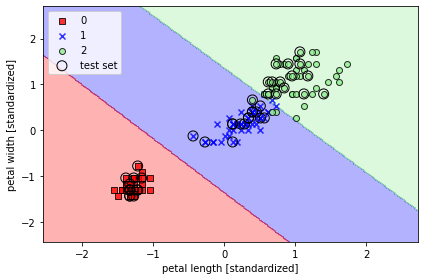

In [38]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std,
                      y_combined,
                      classifier=svm,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_11.png', dpi=300)
plt.show()

In [40]:
"""
로지스틱 회귀 vs 서포트 벡터 머신

- 로지스틱 회귀 
    - 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM 보다 이상치에 민감함
    - SVM 보다 간단하고 구현하기 쉬움
    - 업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합함

- SVM 
    - 결정 경계에 가장 가까운 포인트(서포트 벡터)에 대부분 관심을 둠
    
"""

'\n로지스틱 회귀 vs 서포트 벡터 머신\n\n- 로지스틱 회귀 \n    - 훈련 데이터의 조건부 가능도를 최대화하기 때문에 SVM 보다 이상치에 민감함\n    - SVM 보다 간단하고 구현하기 쉬움\n    - 업데이트가 용이하므로 스트리밍 데이터를 다룰 때 적합함\n\n- SVM \n    - 결정 경계에 가장 가까운 포인트(서포트 벡터)에 대부분 관심을 둠\n    \n'

In [41]:
"""
선형적으로 구분되지 않는 데이터를 위한 커널 방법

- 비선형 분류 문제를 풀기 위해 커널 방법을 사용할 수 있음
    - 커널 SVM

- 커널
    - 샘플 간의 유사도 함수로 해석 가능
    
- 커널 방법
    - 매핑 함수를 사용하여 원본 특성의 비선형 조합을 선형적으로 구분되는 고차원 공간에 투영하는 것
    
- 커널 기법
    - 두 포인트 사이 점곱을 계산하는 데 드는 높은 비용을 절감하기 위해 커널 함수 정의
        - 커널 함수 : 실질적으로 고차원 전환 x, 흉내만 냄
            - 방사 기저 함수(가우시안 커널)
    
"""

'\n선형적으로 구분되지 않는 데이터를 위한 커널 방법\n\n- 비선형 분류 문제를 풀기 위해 커널 방법을 사용할 수 있음\n    - 커널 SVM\n    \n'

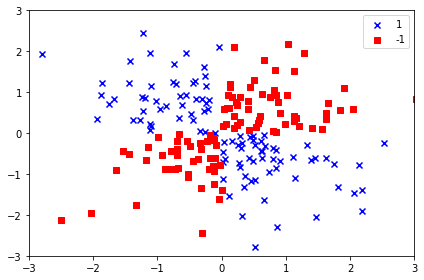

In [42]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/03_12.png', dpi=300)
plt.show()


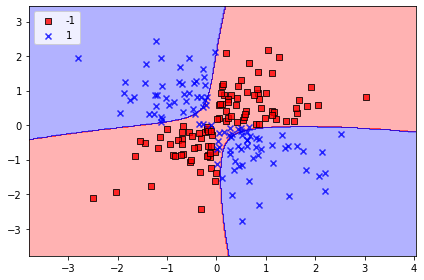

In [43]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_14.png', dpi=300)
plt.show()

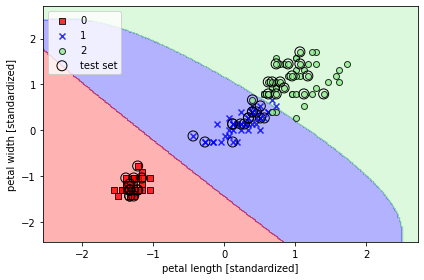

In [44]:

from sklearn.svm import SVC

"""
선형에 가가운 모형
- 일반화 잘됨
"""

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_15.png', dpi=300)
plt.show()

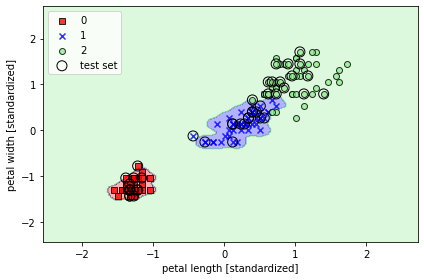

In [45]:
"""
과대 적합
"""

svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('images/03_16.png', dpi=300)
plt.show()